## Reading in wine data, adding quality column

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from skimage.io import imshow

In [2]:
data_csv='../datasets/wine.csv'

In [3]:
data=pd.read_csv(data_csv)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [6]:
qualities=np.sort(data.quality.unique())

In [7]:
{x:count for count,x in enumerate(qualities)}

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [8]:
quality_mapping={x:count for count,x in enumerate(qualities)}

In [9]:
data.quality=data.quality.map(quality_mapping)

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [11]:
data.shape

(1599, 12)

## Continuing with wine data

In [12]:
from sklearn import model_selection

In [45]:
data.quality.size

1599

In [112]:
nfolds=5
kf=model_selection.StratifiedKFold(n_splits=nfolds)

In [113]:
type(kf.split(data,y=data.quality))

generator

In [114]:
list(kf.split(data,y=data.quality))[3]

(array([   0,    1,    2, ..., 1596, 1597, 1598]),
 array([ 825,  827,  834,  835,  839,  841,  843,  845,  846,  848,  849,
         850,  851,  852,  860,  862,  863,  864,  865,  871,  879,  880,
         883,  885,  889,  890,  891,  893,  900,  905,  906,  916,  920,
         924,  928,  930,  931,  933,  934,  937,  939,  955,  959,  961,
         962,  967,  969,  973,  975,  976,  977,  979,  981,  984,  987,
         988,  990,  991,  993,  994,  997, 1000, 1001, 1002, 1003, 1004,
        1005, 1006, 1007, 1008, 1009, 1010, 1012, 1016, 1019, 1022, 1024,
        1027, 1029, 1030, 1031, 1032, 1035, 1036, 1037, 1038, 1040, 1043,
        1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056,
        1057, 1058, 1059, 1060, 1062, 1063, 1064, 1065, 1066, 1067, 1068,
        1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079,
        1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090,
        1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,

In [115]:
len(list(kf.split(data,y=data.quality)))

5

Has the `old_idx` and `new_idx`. Make new row with fold number as additional column.

In [116]:
for fold_num, (old_idx,new_idx) in enumerate(kf.split(data,y=data.quality)):
    data.loc[new_idx,'kfold'] = fold_num

In [117]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.0


In [118]:
data[data.kfold==2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
498,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,5,2.0
588,5.0,0.420,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,5,2.0
593,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.0,2,2.0
594,7.9,0.720,0.17,2.6,0.096,20.0,38.0,0.99780,3.40,0.53,9.5,2,2.0
595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,8.9,0.500,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,3,2.0
1044,6.4,0.390,0.33,3.3,0.046,12.0,53.0,0.99294,3.36,0.62,12.2,3,2.0
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,3,2.0
1061,9.1,0.400,0.50,1.8,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,5,2.0


### Check if folds are of same size

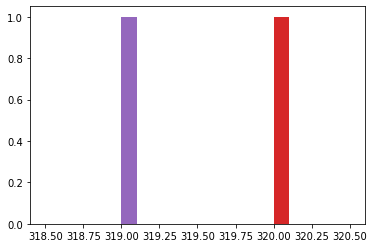

In [119]:
for fold in range(0,nfolds):
    plt.hist(data[data.kfold==fold].quality.size)

### Check if this fold has the no skewed distribution of target variables

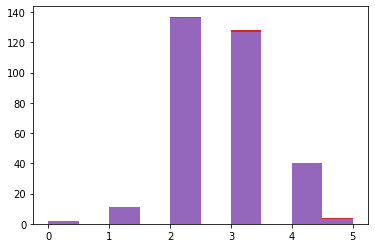

In [120]:
for fold in range(0,nfolds):
    plt.hist(data[data.kfold==fold].quality)

This does not have the `target` uniformly distributed among each folds. Some classes have less than 10 members.

### Nicer way to plot cumulative class distribution using `searborn`

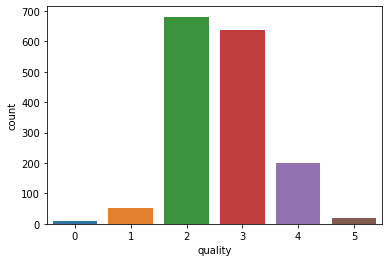

In [122]:
b = sns.countplot(x='quality', data=data)

So, we dont have enough samples for categories 0, 1, and 5. So, not great dataset. Need more data.

## Use each of these folds to cross validate

In [123]:
from sklearn import tree 
from sklearn import metrics

Define function that trains and tests.

In [124]:
def onefold(fold,train_data, test_data,cols,depth=5):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(train_data[cols],train_data.quality)
    train_predictions=clf.predict(train_data[cols])
    test_predictions=clf.predict(test_data[cols])
    train_accuracy=metrics.accuracy_score(train_data.quality,train_predictions)
    test_accuracy=metrics.accuracy_score(test_data.quality,test_predictions)
    return np.array([fold,train_accuracy,test_accuracy])   

Check for one fold

In [125]:
train_cols=list(data.columns[:-2])
fold=0
train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
test_data=data[data.kfold==fold].copy().reset_index(drop=True)
onefold(fold,train_data,test_data,cols=train_cols,depth=5)

array([0.        , 0.65754496, 0.521875  ])

Loop over all folds

In [126]:
train_cols=list(data.columns[:-2])
result=np.zeros((nfolds,3))
for fold in range(0,nfolds):
    train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
    test_data=data[data.kfold==fold].copy().reset_index(drop=True)
    result[fold,:]=onefold(fold,train_data,test_data,cols=train_cols,depth=5)        

In [127]:
result

array([[0.        , 0.65754496, 0.521875  ],
       [1.        , 0.67396403, 0.5125    ],
       [2.        , 0.66770915, 0.603125  ],
       [3.        , 0.68569195, 0.53125   ],
       [4.        , 0.68203125, 0.56426332]])

plot!

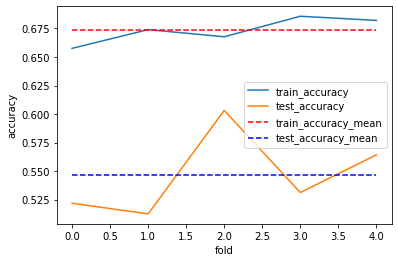

In [130]:
plt.plot(result[:,0],result[:,1],label='train_accuracy')
plt.plot(result[:,0],result[:,2],label='test_accuracy')
plt.plot(result[:,0],nfolds*[result[:,1].mean()],'r--', label='train_accuracy_mean')
plt.plot(result[:,0],nfolds*[result[:,2].mean()],'b--', label='test_accuracy_mean')
plt.xlabel("fold")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Doesn't change much about the outcome.